In [26]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

archivo='DATA-PRUEBA_REPITENCIAS 2017-2020-UNMSM.xlsx'
datos=pd.read_excel('C:\\Users\\acer\\Pictures\\6to CICLO\\BIG DATA\\EXAMEN\\CASO-UNMSM\\'+archivo,sheet_name=None)
datoglobal=pd.concat(datos,ignore_index=True)
print(datosglobal)


        cod_facultad  cod_escuela cod_semestre cod_alumno cod_plan  \
0                1.0          1.0        20171   12010240   2015     
1                1.0          1.0        20171   12010240   2015     
2                1.0          1.0        20171   12010240   2015     
3                1.0          1.0        20171   12010240   2015     
4                1.0          1.0        20171   05010012   2015     
...              ...          ...          ...        ...      ...   
221674          20.0          2.0        20202   19200315   2018     
221675          20.0          2.0        20202   19200315   2018     
221676          20.0          2.0        20202   19200320   2018     
221677          20.0          2.0        20202   19200324   2018     
221678          20.0          2.0        20202   19200327   2018     

       cod_asignatura                                  asignatura  num_rep  
0            M15011M       ATENCIÓN DE LA SALUD NIVEL I y II  (I)      1.0  
1    

In [47]:
#Repitencias por facultad , semestre y escuela

repitencias=datoglobal.groupby(['cod_facultad','cod_escuela','cod_semestre'])['cod_alumno'].nunique().reset_index(name='REPITENCIAS')
print(repitencias)

     cod_facultad  cod_escuela cod_semestre  REPITENCIAS
0             1.0          1.0        20171          211
1             1.0          1.0        20172          141
2             1.0          1.0        20181          156
3             1.0          1.0        20182          110
4             1.0          1.0        20191          118
..            ...          ...          ...          ...
498          20.0          2.0        20182          259
499          20.0          2.0        20191          330
500          20.0          2.0        20192          107
501          20.0          2.0        20201          295
502          20.0          2.0        20202          239

[503 rows x 4 columns]


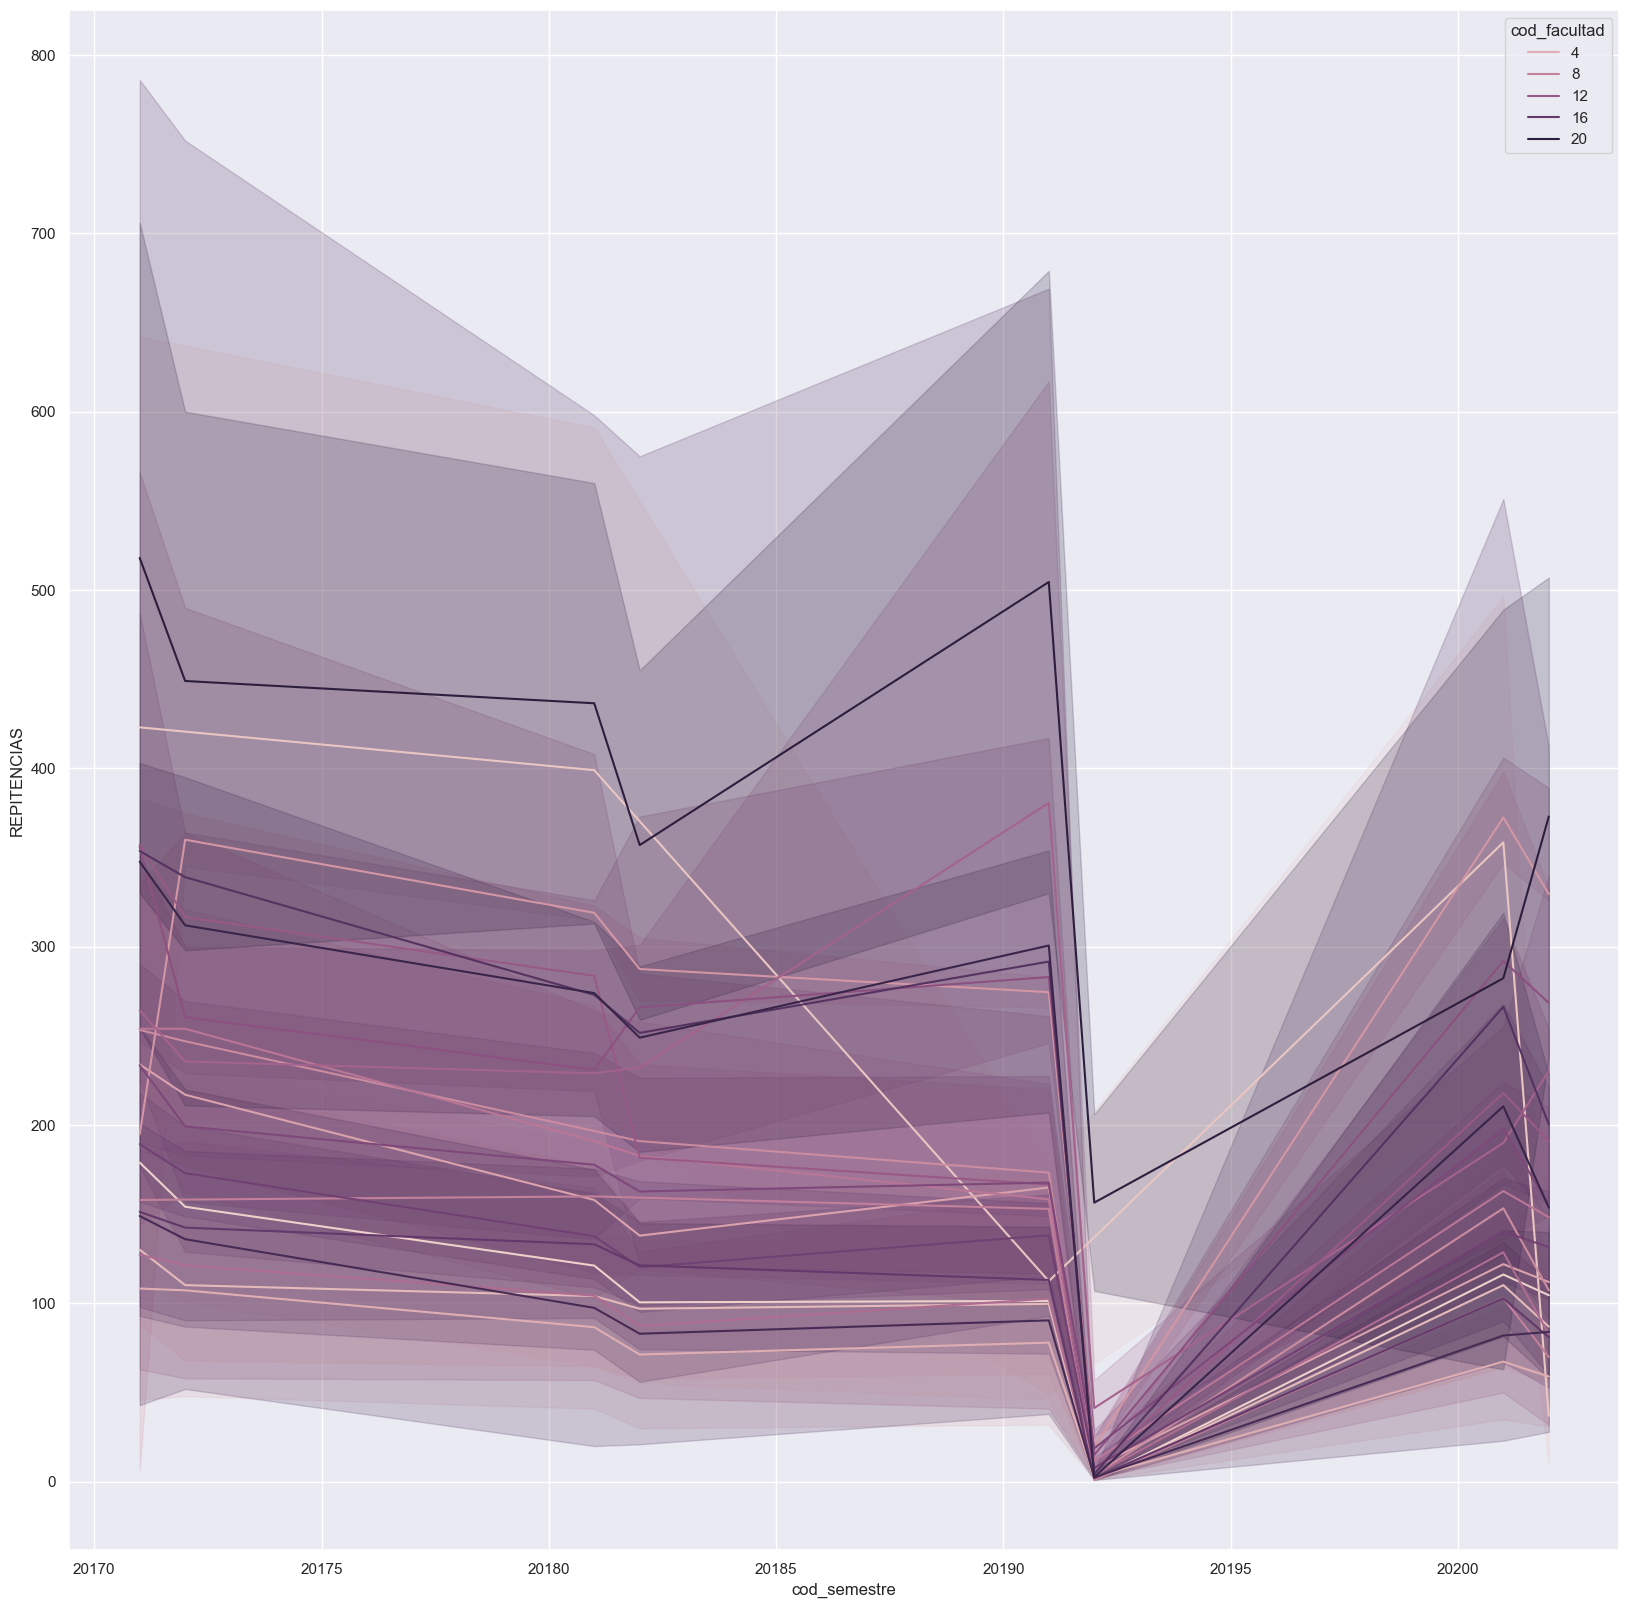

In [29]:
sb.set(rc={'figure.figsize':(20,20)})
grafica1=sb.lineplot(x='cod_semestre',y='REPITENCIAS',data=repitencias,hue='cod_facultad')

<AxesSubplot:title={'center':'Cantidad de Repitentes por Facultad'}>

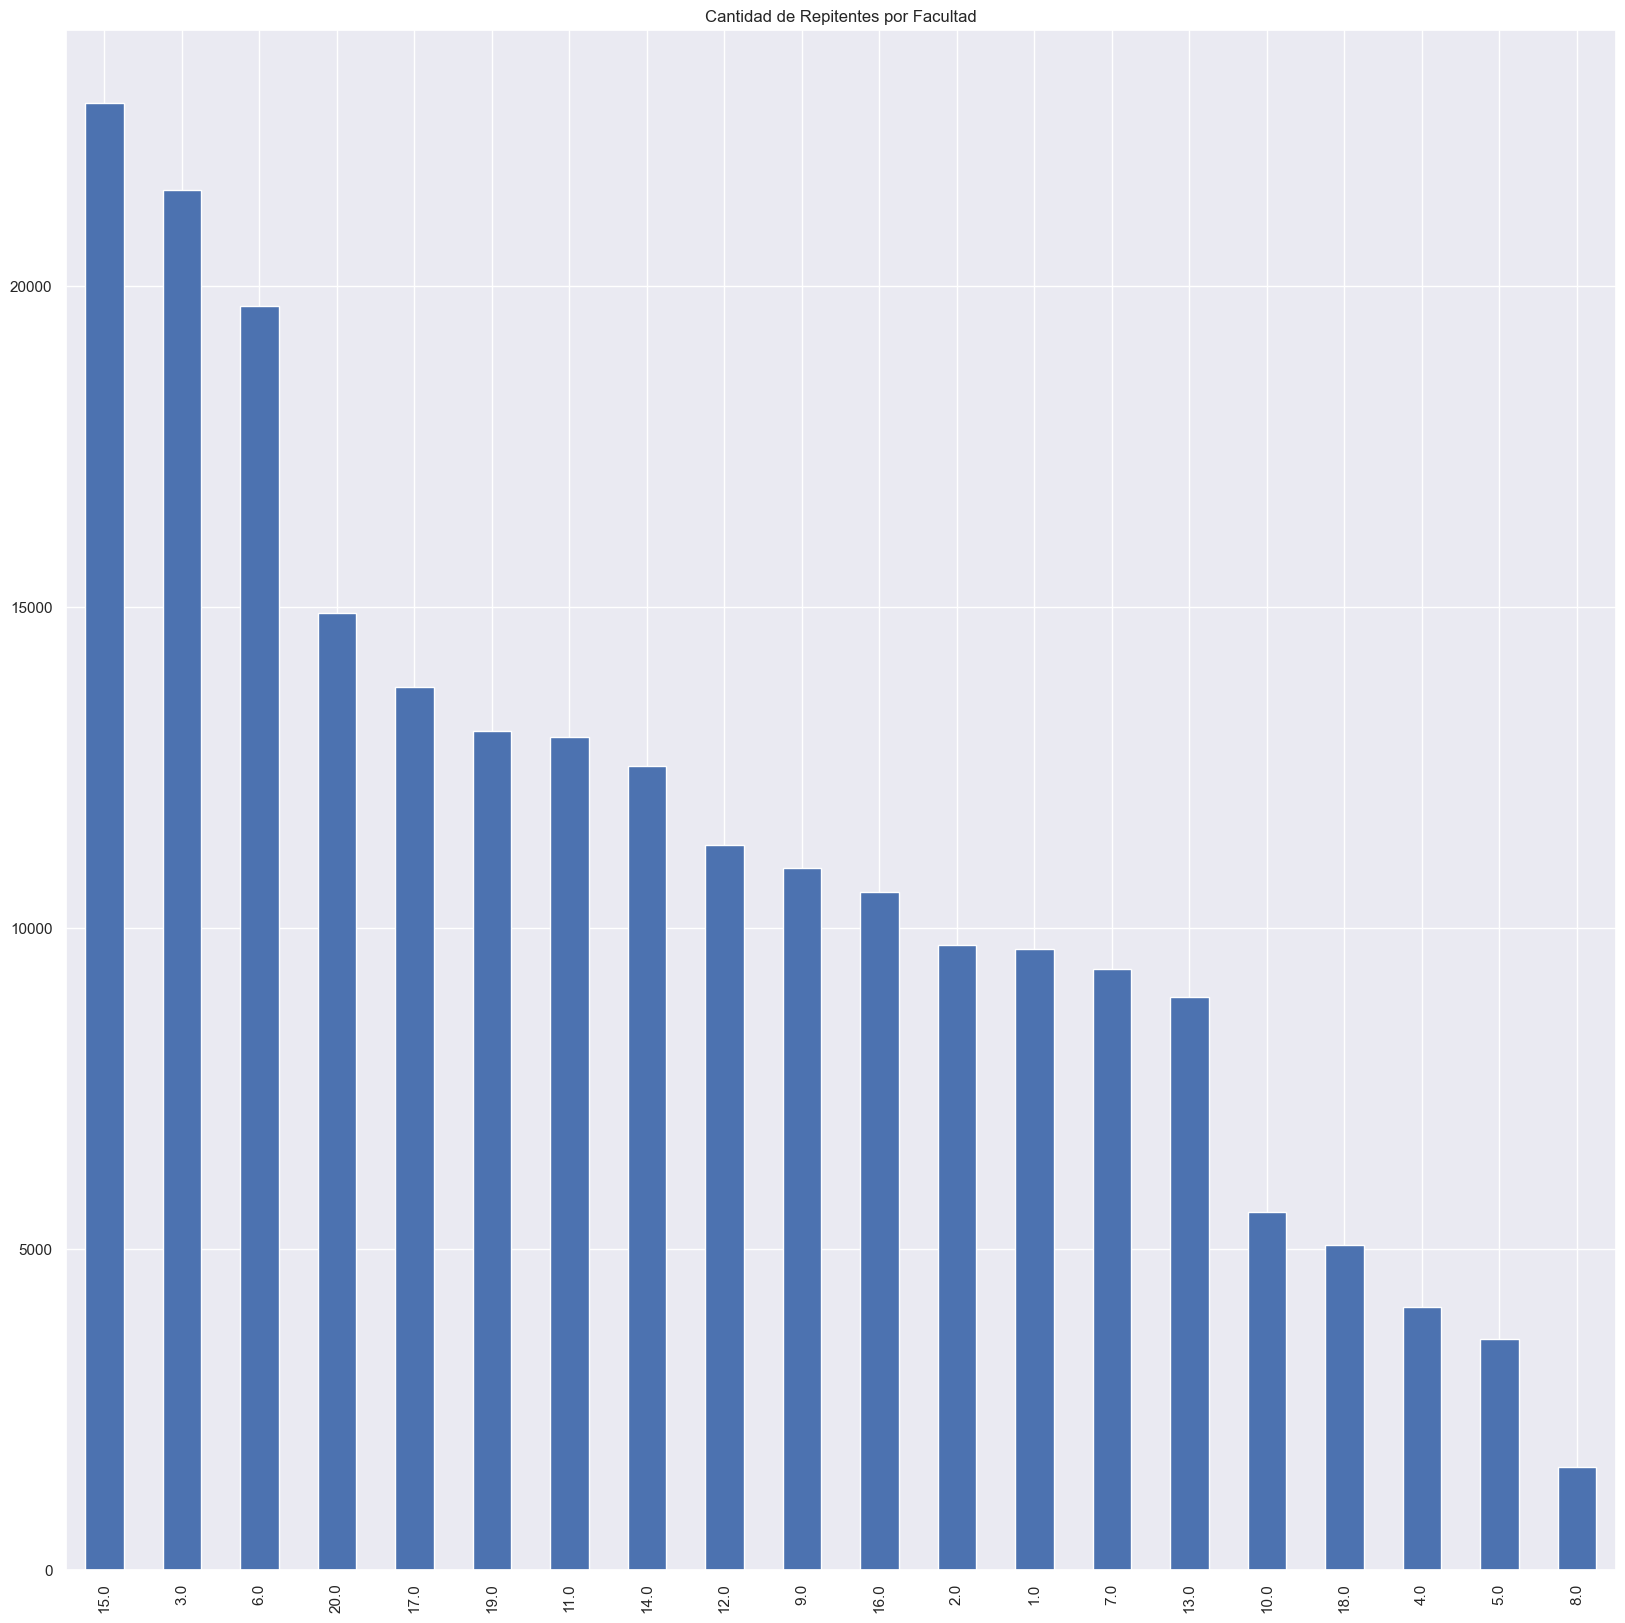

In [31]:
datoglobal['cod_facultad'].value_counts().plot(kind='bar',title='Cantidad de Repitentes por Facultad')

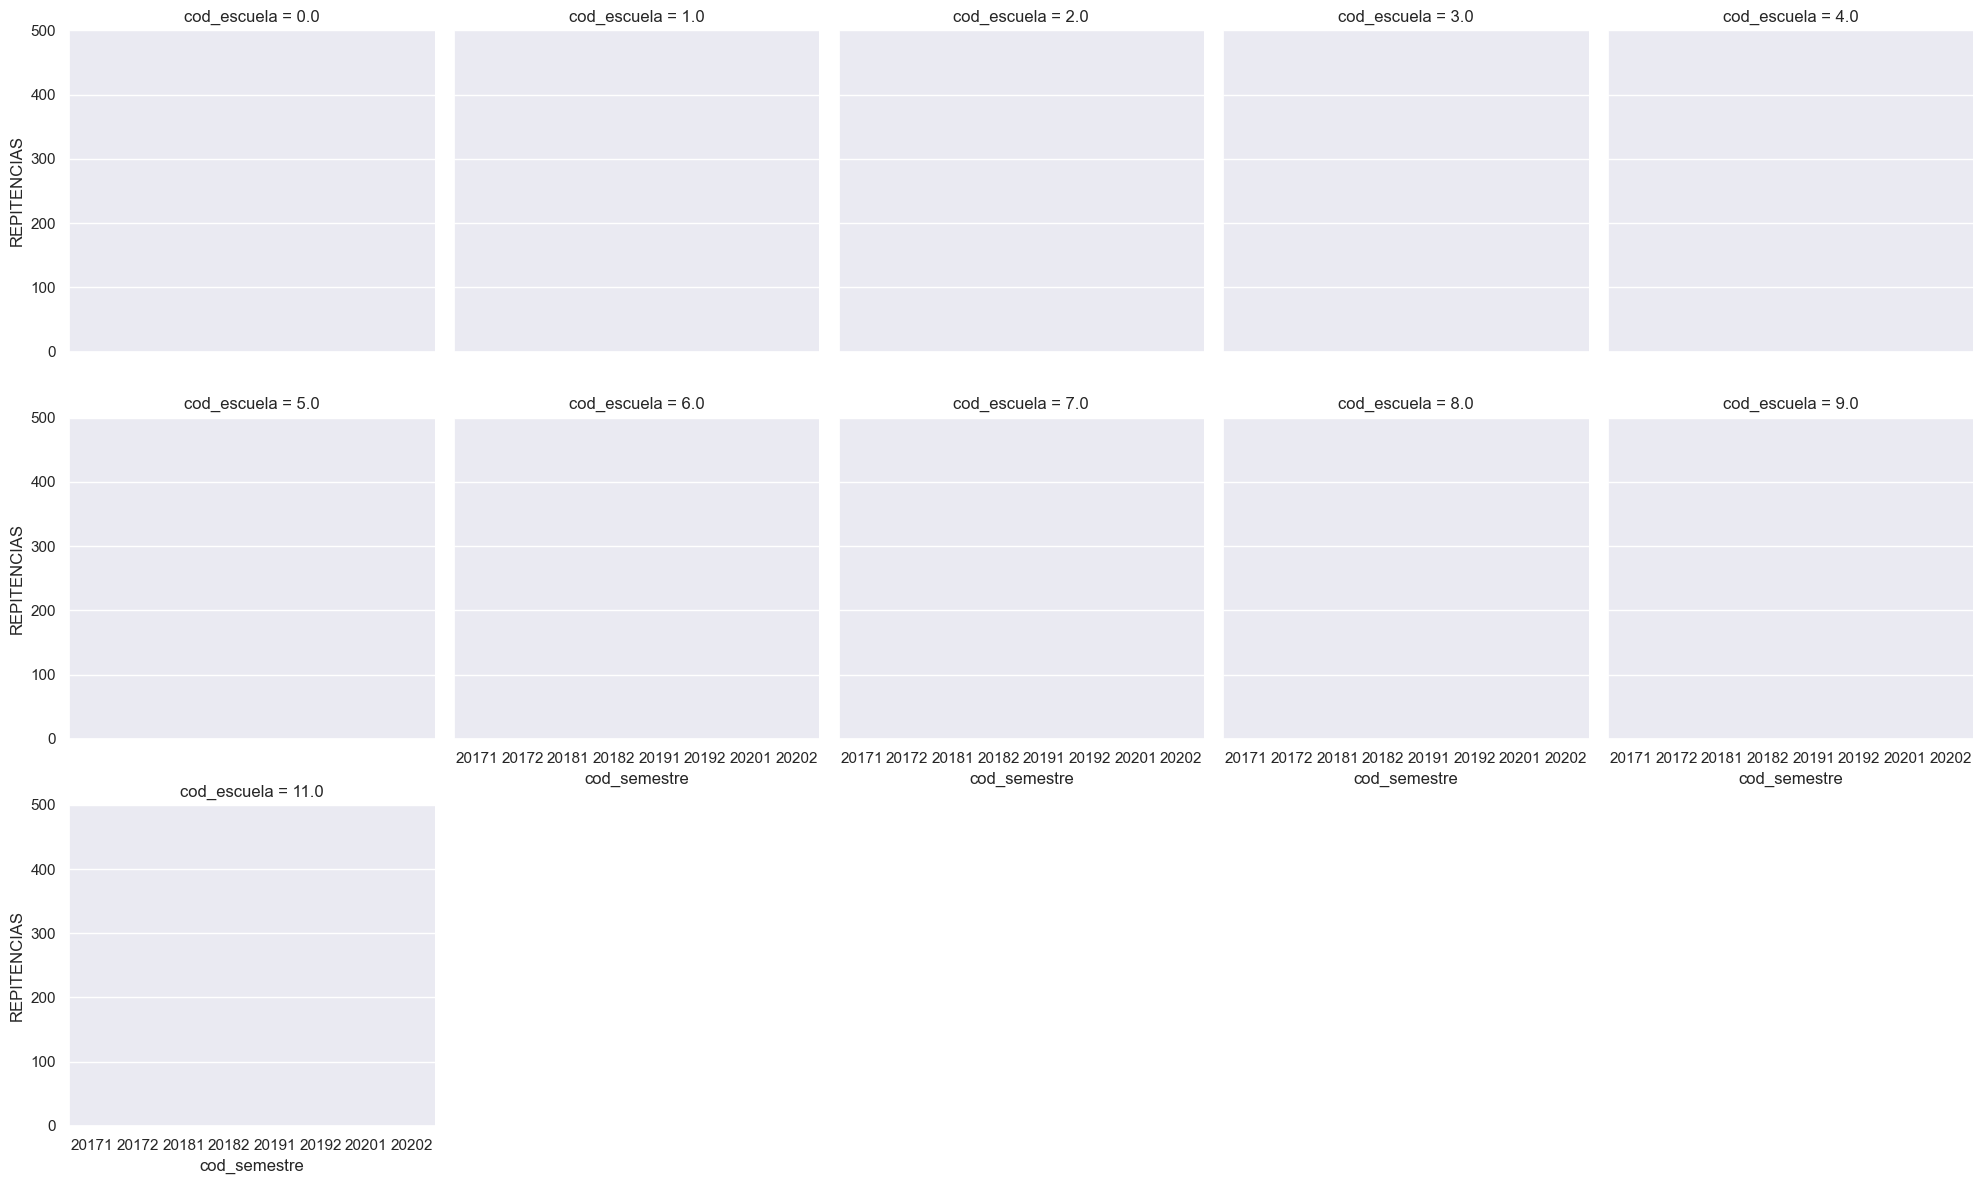

In [75]:
g = sb.FacetGrid(repitencias, col="cod_escuela", height=4, col_wrap=5, ylim=(0, 500))
g.map(sb.pointplot, "cod_semestre", "REPITENCIAS", order=['20171','20172','20181','20182','20191','20192','20201','20202'])

In [77]:
# nro de 1,2,3,4,5 de repitencias por escuela y planes de estudio

rep_esc_estudio=datoglobal.groupby(['cod_escuela','cod_plan','num_rep'])['num_rep'].count().reset_index(name='REPITENCIAS')
print(rep_esc_estudio)

     cod_escuela cod_plan  num_rep  REPITENCIAS
0            0.0   2009        1.0           82
1            0.0   2009        2.0           46
2            0.0   2009        3.0            9
3            0.0   2009        4.0           10
4            0.0   2009        5.0            4
..           ...      ...      ...          ...
448          9.0   2018        1.0           20
449          9.0   2018        2.0            2
450         11.0   2010        1.0            4
451         11.0   2010        2.0            7
452         11.0   2010        3.0            1

[453 rows x 4 columns]


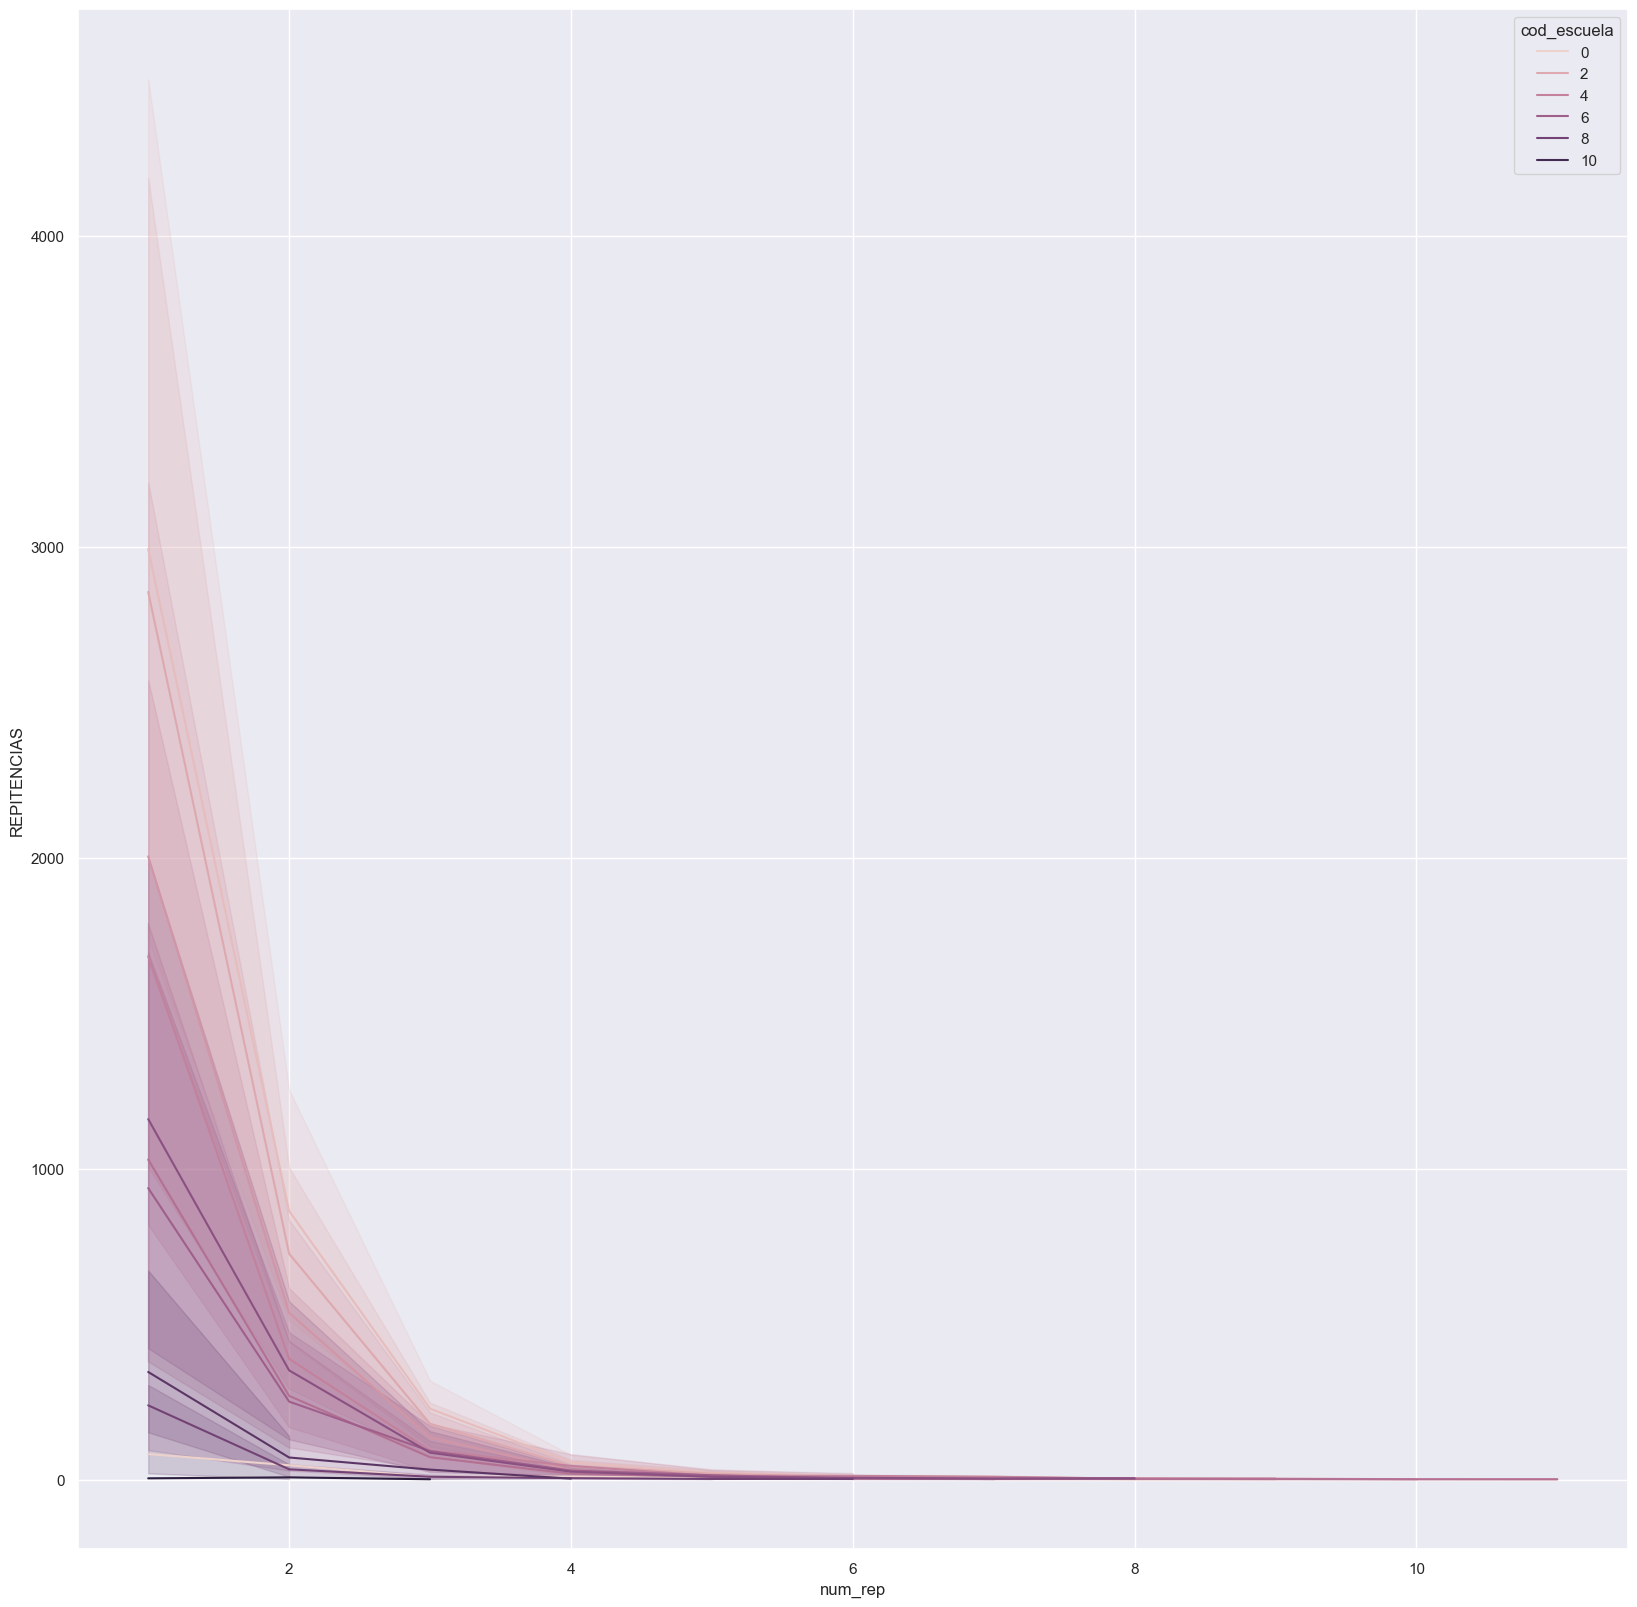

In [78]:
grafica2=sb.lineplot(x='num_rep',y='REPITENCIAS',data=rep_esc_estudio,hue='cod_escuela')

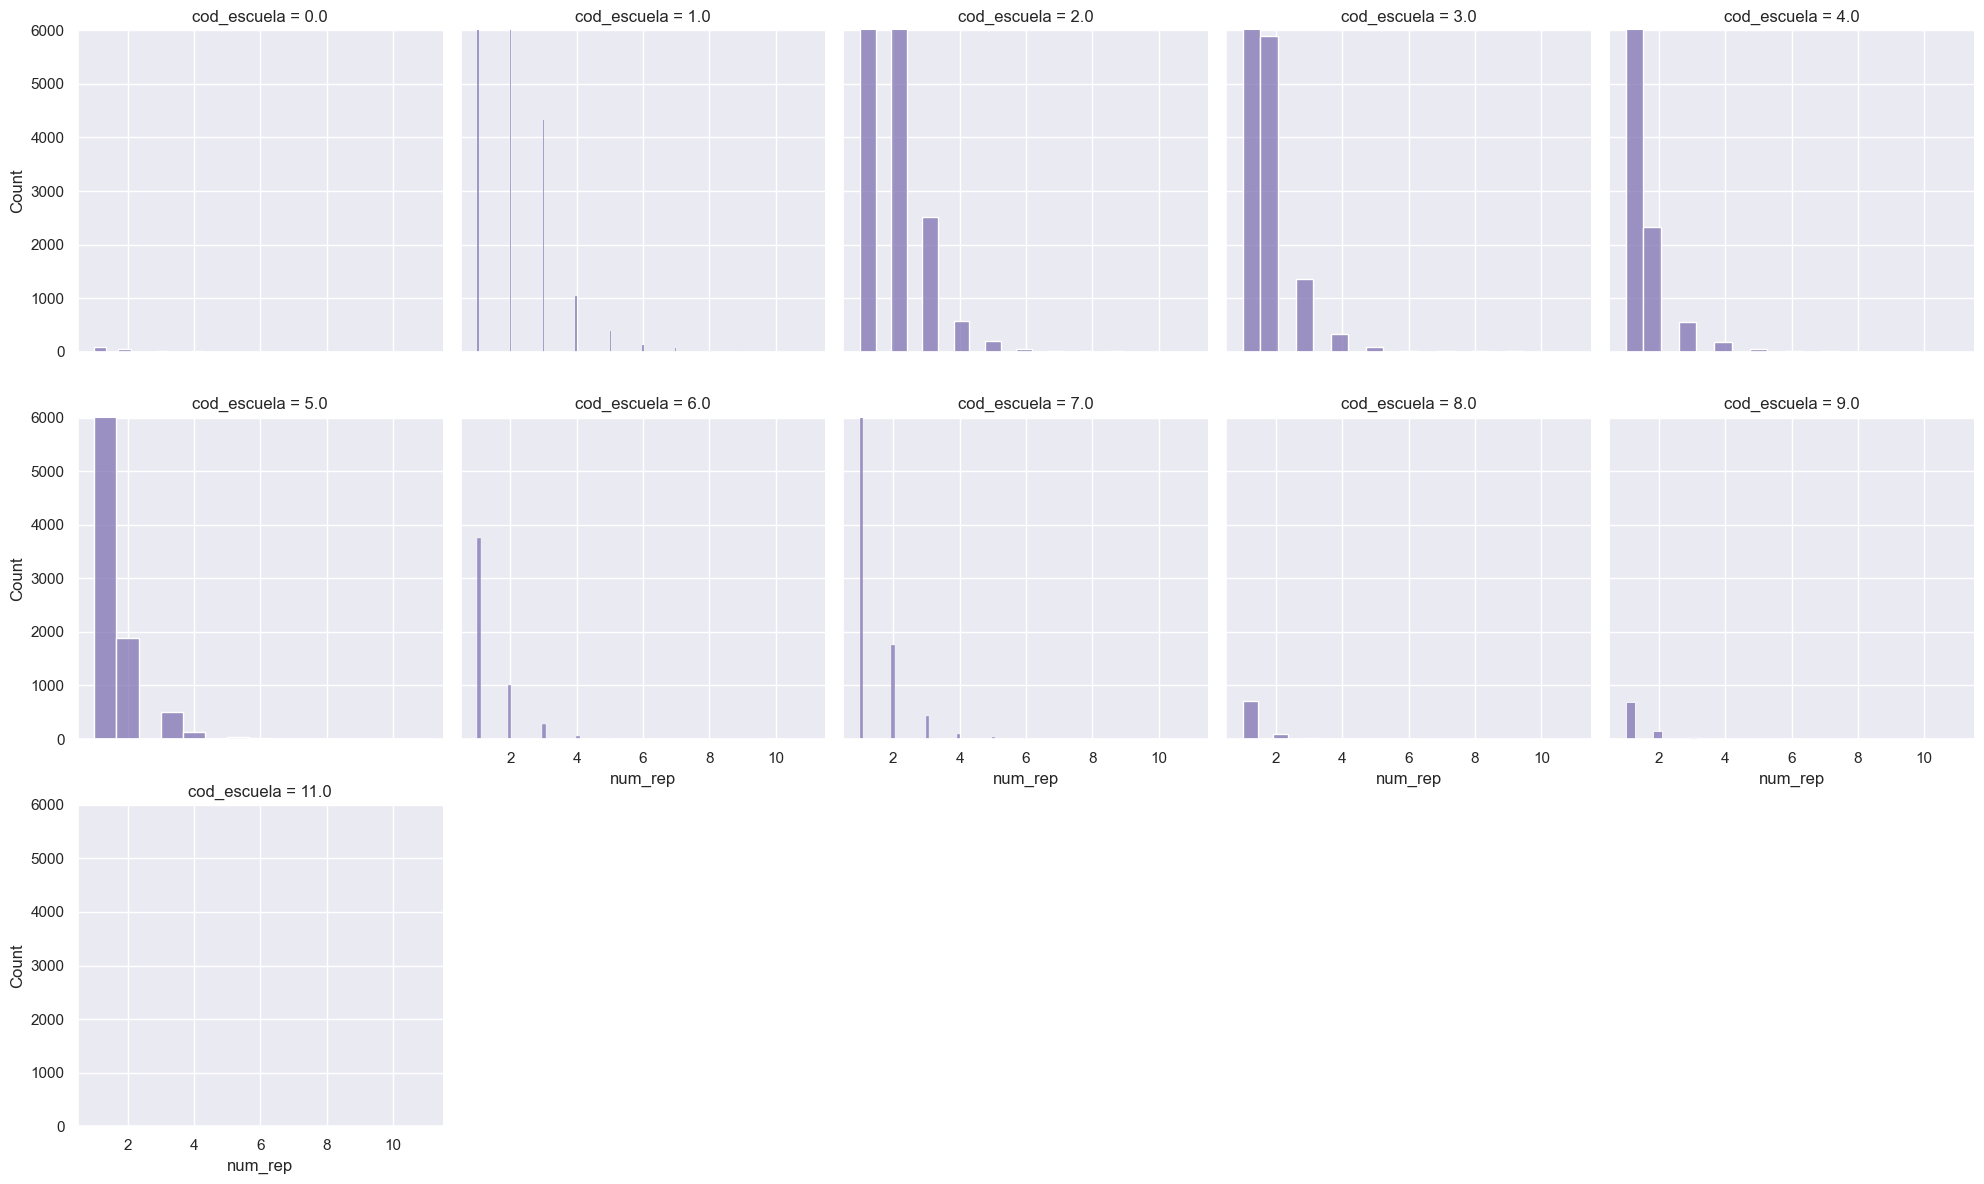

In [80]:
#FacetGrid

g = sb.FacetGrid(datoglobal, col="cod_escuela", height=4, col_wrap=5, ylim=(0, 6000))
g.map_dataframe(sb.histplot, x="num_rep",color='m')

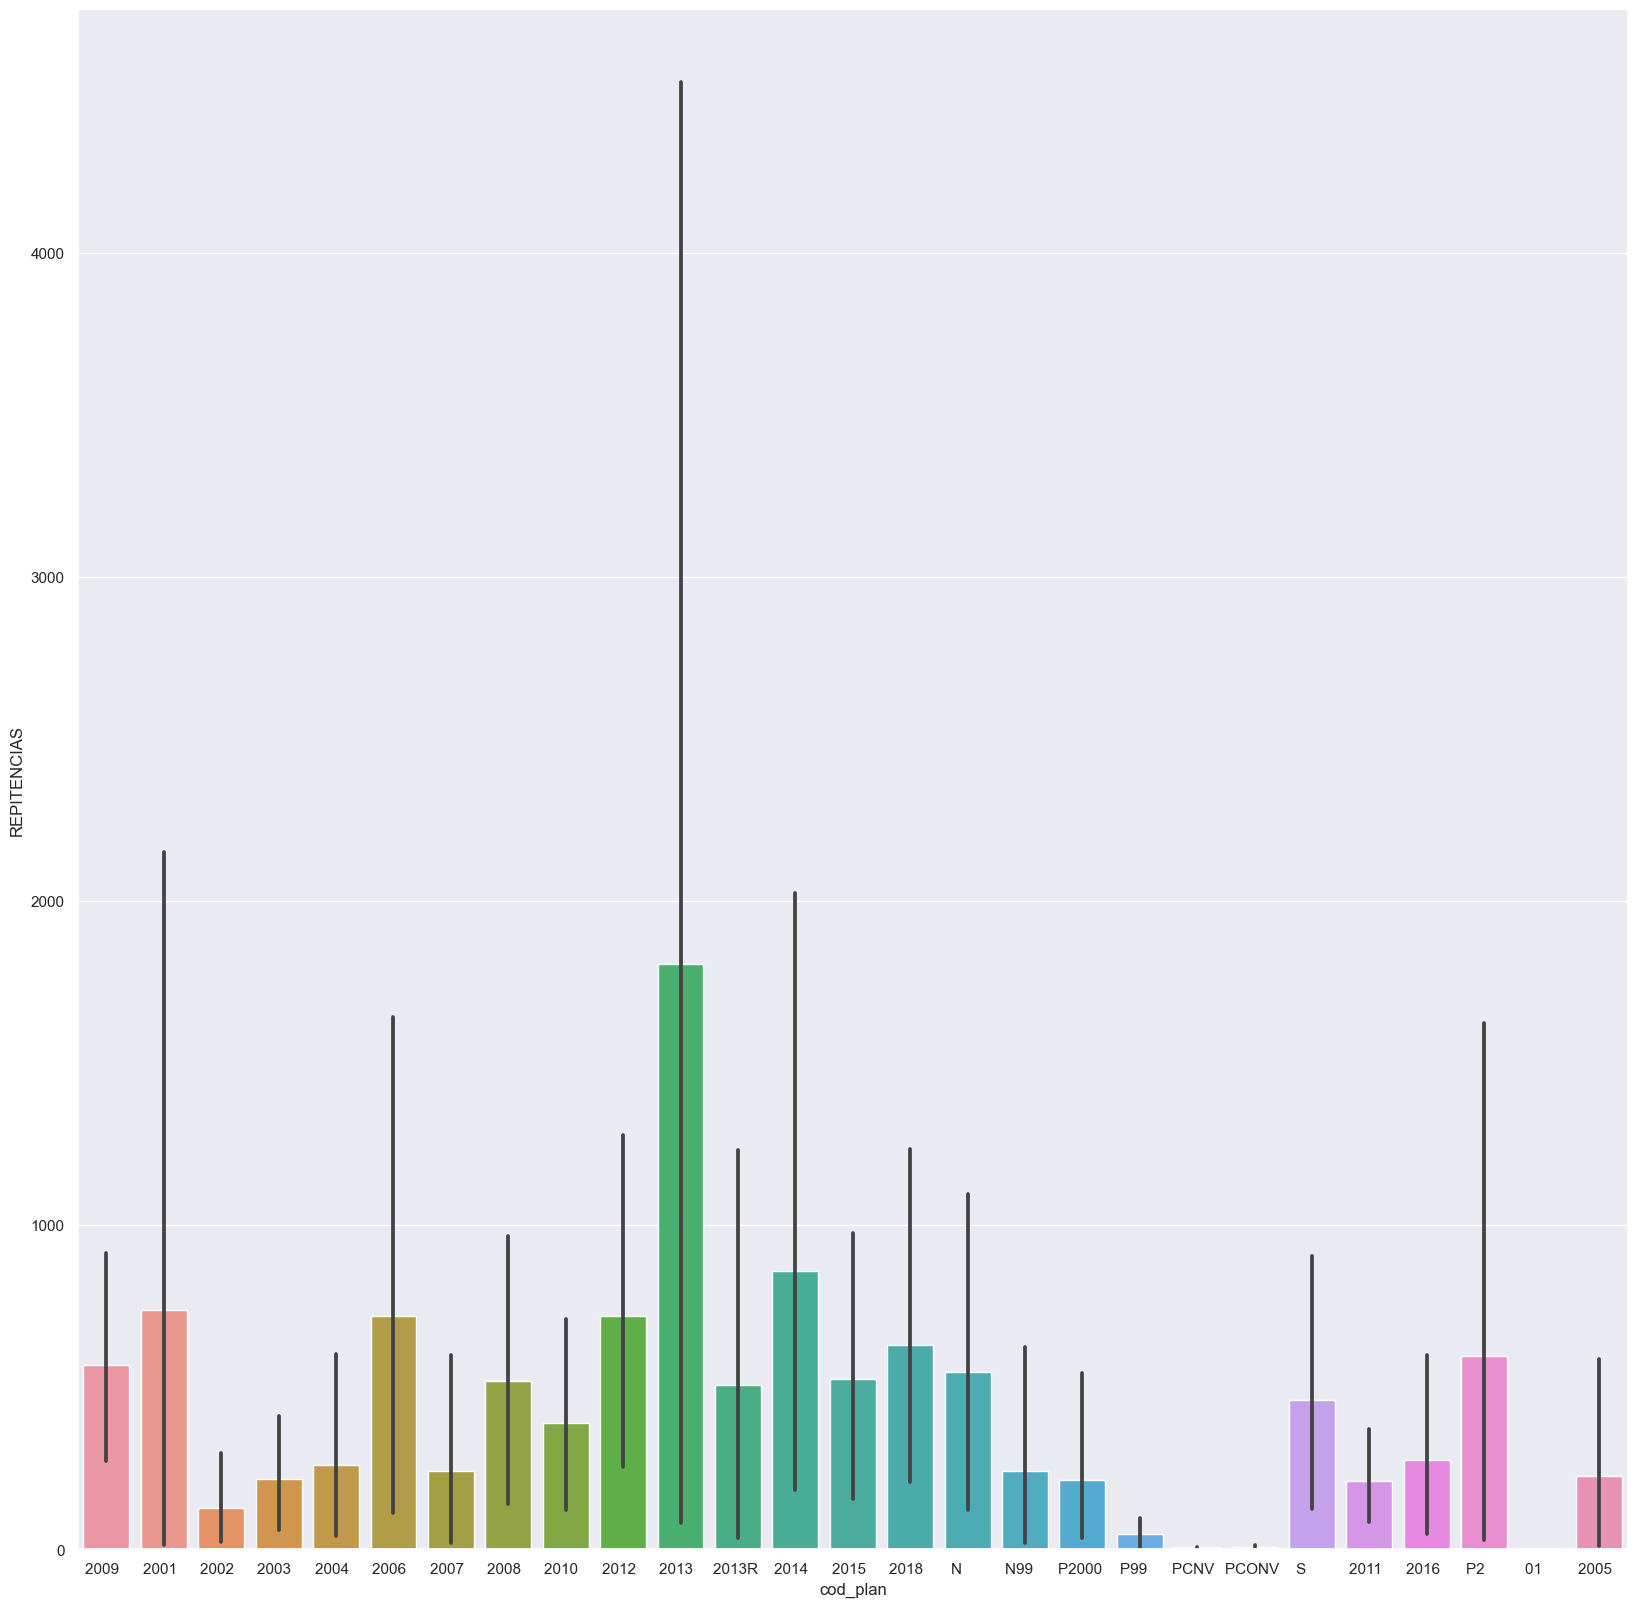

In [81]:
graficaplan=sb.barplot(x='cod_plan',y='REPITENCIAS',data=rep_esc_estudio)

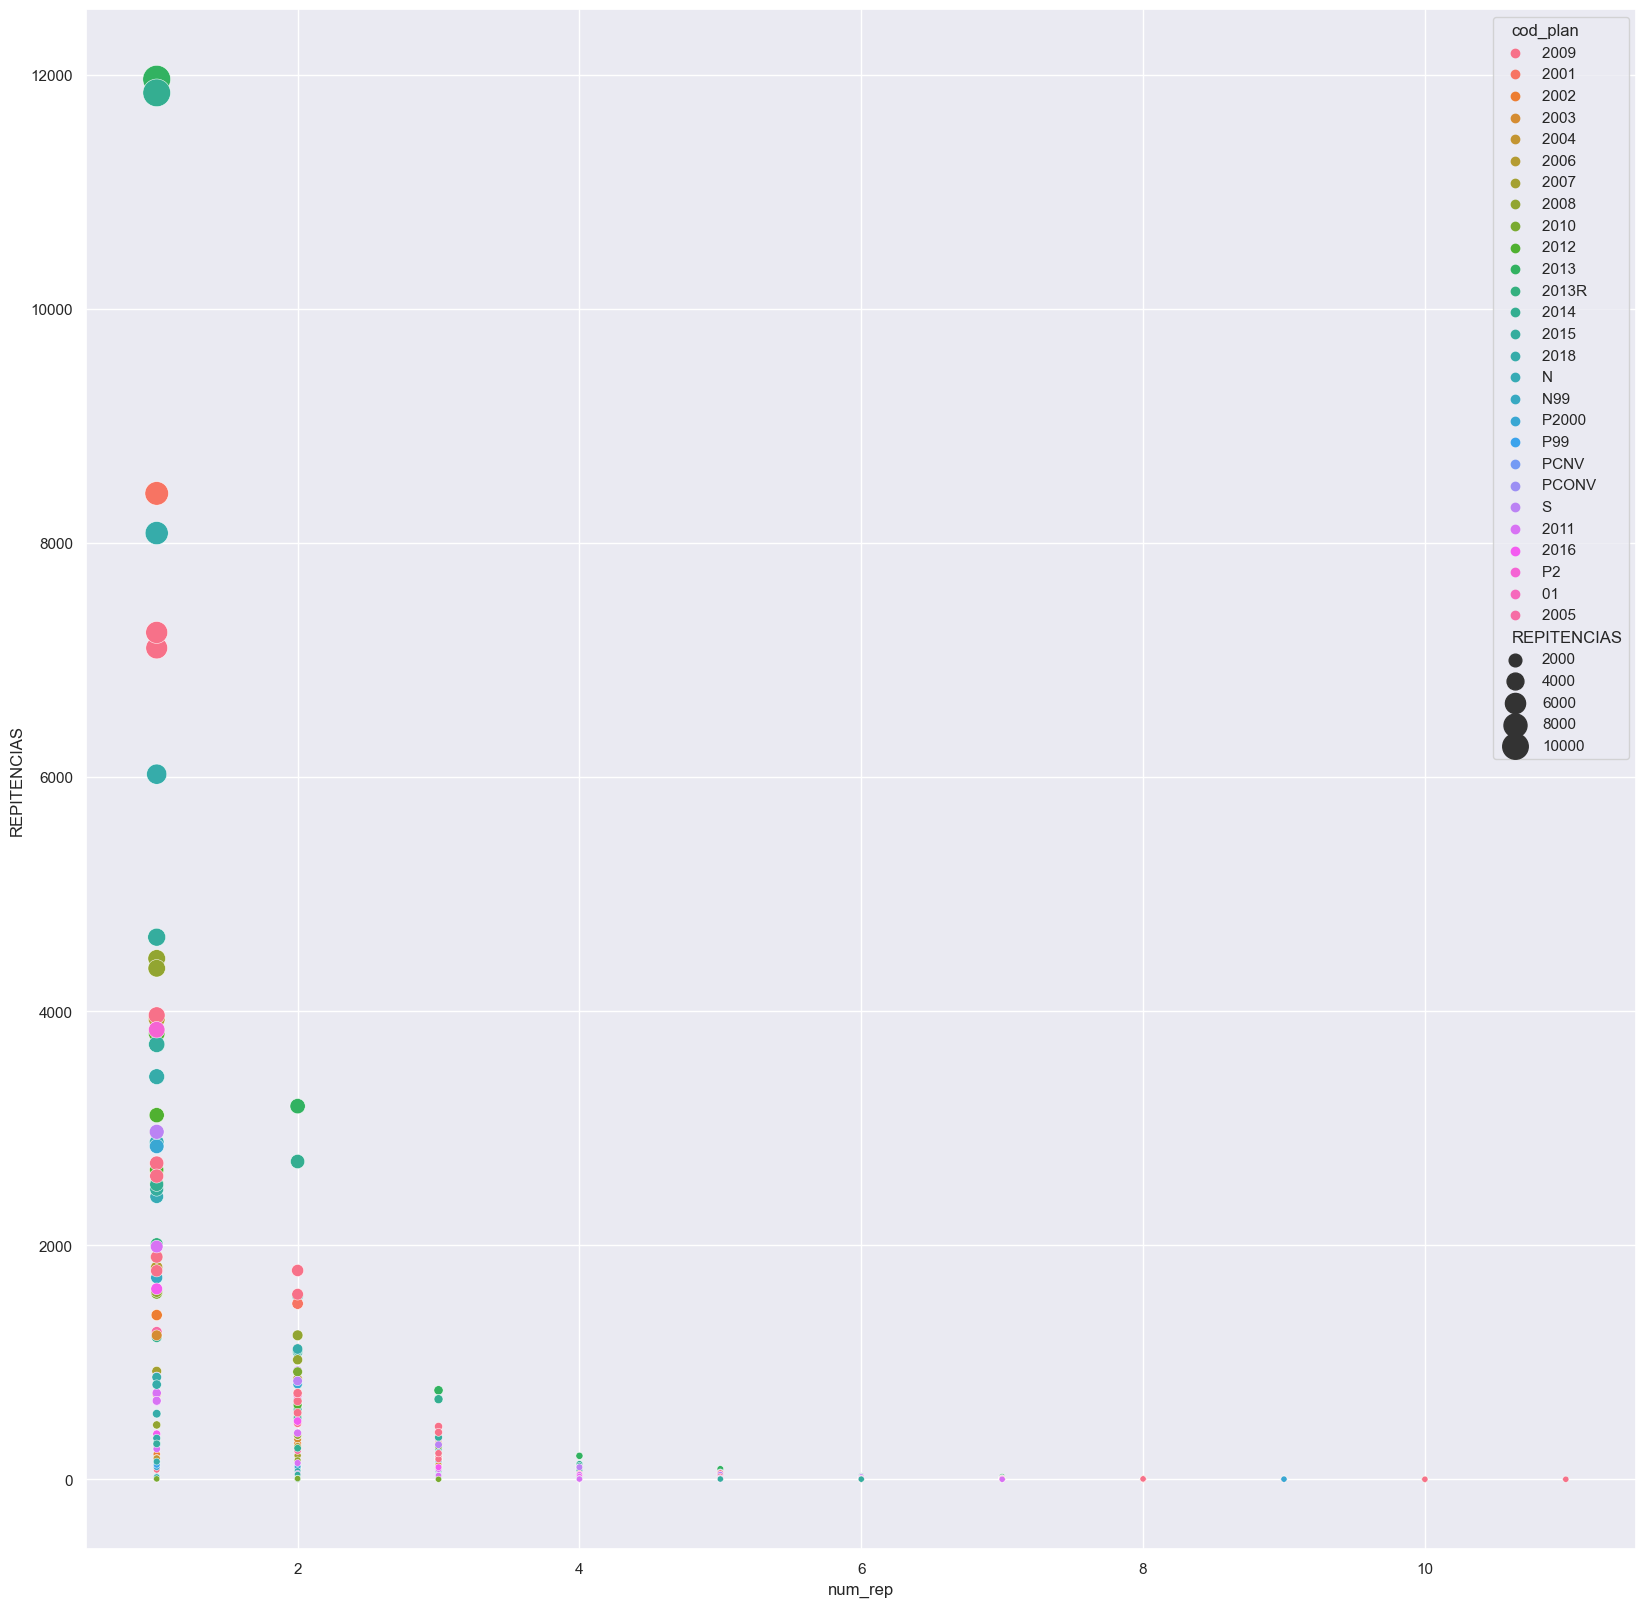

In [82]:
graficaplan2=sb.scatterplot(x='num_rep',y='REPITENCIAS',data=rep_esc_estudio,hue='cod_plan',size='REPITENCIAS',sizes=(20,400))

In [113]:
# Estudiantes jalados por ciclo

est_jal_sem=datoglobal.groupby(['cod_semestre'])['cod_alumno'].nunique().reset_index(name='est_jalados')
#est_jal_sem.fillna(0)
est_jal_sem2=est_jal_sem.drop(index=8)
print(est_jal_sem2)

  cod_semestre  est_jalados
0        20171        15174
1        20172        12770
2        20181        11974
3        20182         9846
4        20191        11288
5        20192          750
6        20201        11397
7        20202         9153


object


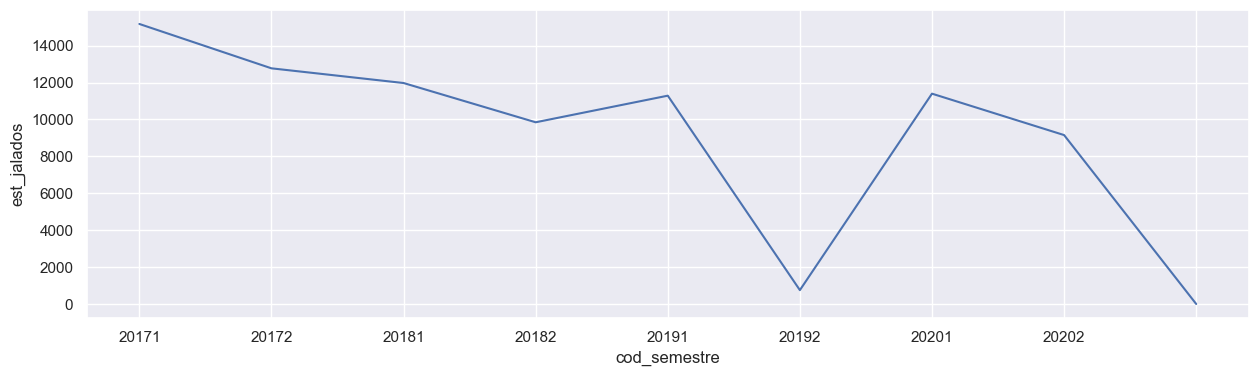

In [115]:
fig, ax=plt.subplots(figsize=(15,4))

est_jal_sem['cod_semestre'] = est_jal_sem['cod_semestre'].astype(str)

print(est_jal_sem['cod_semestre'].dtypes)

graf_jal_sem=sb.lineplot(ax=ax,x='cod_semestre',y='est_jalados',ci=None,data=est_jal_sem)

In [117]:
#Algoritmo de Regresión Lineal

from sklearn import linear_model
from sklearn.metrics import r2_score

est_jal_sem2['cod_semestre'] = est_jal_sem2['cod_semestre'].astype(int)
regr=linear_model.LinearRegression()

x=est_jal_sem['cod_semestre']
y=est_jal_sem['est_jalados']

In [124]:
x2=x.drop(index=8)
y2=y.drop(index=8)
X=x2[:,np.newaxis]
print(X)

[['20171']
 ['20172']
 ['20181']
 ['20182']
 ['20191']
 ['20192']
 ['20201']
 ['20202']]


C:\Users\acer\AppData\Local\Temp\ipykernel_25144\3456379993.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=x2[:,np.newaxis]


In [125]:
regr=linear_model.LinearRegression()
regr.fit(X,y2)
print(regr.fit(X,y2))
print(regr.coef_)

LinearRegression()
[-168.14071856]


In [128]:
X = X.astype(float)
m=regr.coef_[0]
b=regr.intercept_
y_p=m*X+b
print('y={0}*x+{1}'.format(m,b))
print('El valor de R^2: ', r2_score(y2,y_p))

y=-168.1407185628742*x+3404466.6152694602
El valor de R^2:  0.22207023627135825


Text(0, 0.5, 'Eje Y')

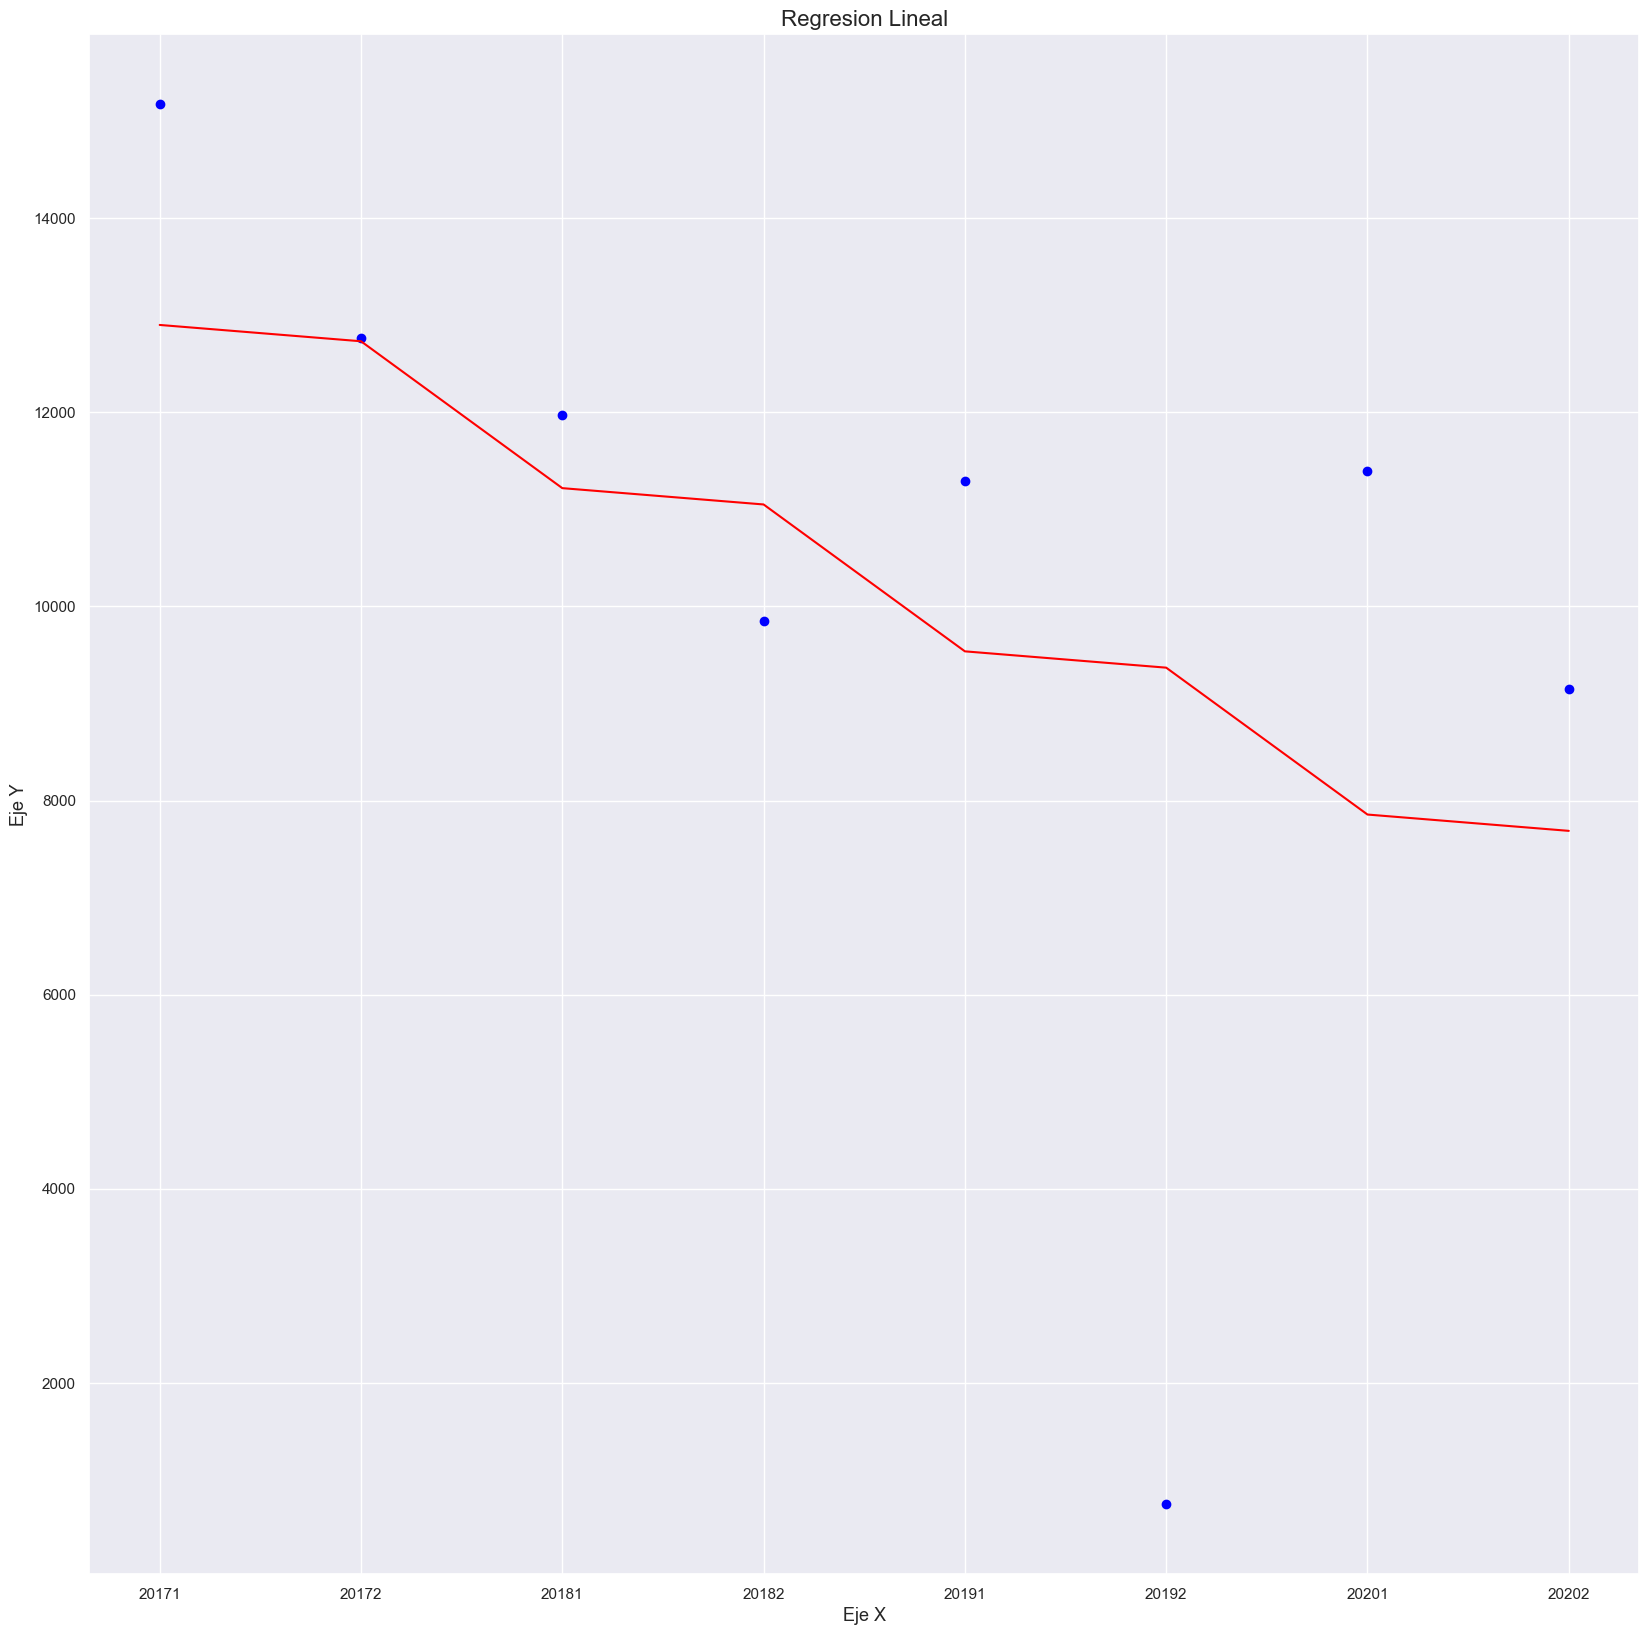

In [129]:
plt.scatter(x2,y2,color='blue')
plt.plot(x2,y_p,color='red')
plt.title('Regresion Lineal',fontsize=16)
plt.xlabel('Eje X',fontsize=13)
plt.ylabel('Eje Y',fontsize=13)

In [130]:
X_new=[[20211],[20212]]
predicciones=regr.predict(X_new)
print(predicciones)

[6174.55239521 6006.41167665]


In [133]:
new_row1 = {'cod_semestre':X_new[0][0],'est_jalados':predicciones[0]}
new_row2 = {'cod_semestre':X_new[1][0],'est_jalados':predicciones[1]}

est_jal_sem_predict=est_jal_sem2.append(new_row1, ignore_index=True)
est_jal_sem_predict=est_jal_sem_predict.append(new_row2, ignore_index=True)

est_jal_sem_predict['cod_semestre']=est_jal_sem_predict['cod_semestre'].astype(int)
est_jal_sem_predict['est_jalados']=est_jal_sem_predict['est_jalados'].astype(int)

print(est_jal_sem_predict)

   cod_semestre  est_jalados
0         20171        15174
1         20172        12770
2         20181        11974
3         20182         9846
4         20191        11288
5         20192          750
6         20201        11397
7         20202         9153
8         20211         6174
9         20212         6006


C:\Users\acer\AppData\Local\Temp\ipykernel_25144\2117216224.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  est_jal_sem_predict=est_jal_sem2.append(new_row1, ignore_index=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_25144\2117216224.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  est_jal_sem_predict=est_jal_sem_predict.append(new_row2, ignore_index=True)


In [134]:
y_pred=m*np.array([[20211],[20212]])+b
print(y_pred)

[[6174.55239521]
 [6006.41167665]]


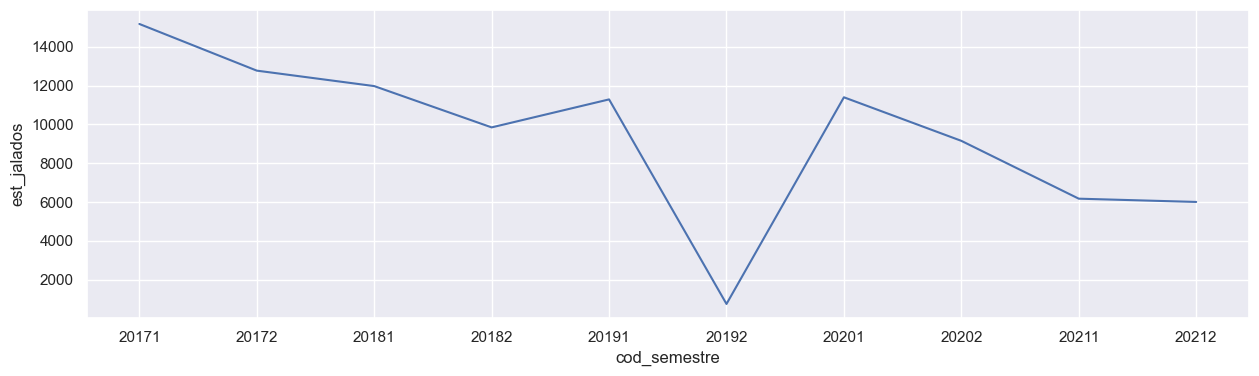

In [135]:
est_jal_sem_predict['cod_semestre'] = est_jal_sem_predict['cod_semestre'].astype(str)
fig, ax=plt.subplots(figsize=(15,4))

graf_est_jal_sem_predict=sb.lineplot(ax=ax,x='cod_semestre',y='est_jalados',ci=None,data=est_jal_sem_predict)